# Posttest 5

Nurulfiqri Istiqamah Tahir <br>
2009106083

### Import Package

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix

### Read Dataset

In [2]:
df = pd.read_csv("titlesBersih.csv")
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Movie,Show
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1,tt0047500,6.510861,23439.382474,0.600000,6.829175,0.0,1.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],2,tt0075314,8.200000,808582.000000,40.965000,8.179000,1.0,0.0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],2,tt0068473,7.700000,107673.000000,10.010000,7.300000,1.0,0.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],2,tt0071853,8.200000,534486.000000,15.461000,7.811000,1.0,0.0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,TV-MA,150,"['war', 'action']","['GB', 'US']",2,tt0061578,7.700000,72662.000000,20.398000,7.600000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,TV-MA,100,"['romance', 'drama']",['NG'],2,tt13857480,6.800000,45.000000,1.466000,6.829175,1.0,0.0
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,TV-MA,134,['drama'],[],2,tt11803618,7.700000,348.000000,22.637925,6.829175,1.0,0.0
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,TV-MA,90,['comedy'],['CO'],2,tt14585902,3.800000,68.000000,26.005000,6.300000,1.0,0.0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],2,tt0047500,6.510861,23439.382474,1.296000,10.000000,1.0,0.0


### Data Split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df[['imdb_score','imdb_votes','tmdb_popularity','tmdb_score']]
y = df[['type']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### Data Normalisasi

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)


## 1. K-Nearest Neighbour (K-NN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
modelKnn = KNeighborsClassifier()
modelKnn.fit(X_train_std,y_train)

knn_pred = modelKnn.predict(X_test_std)
akurasi_KNN = accuracy_score(y_test, knn_pred)
print("Akurasi algoritma KNN :", round(akurasi_KNN,2))

Akurasi algoritma KNN : 0.73


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 2. Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
gaussnb  = GaussianNB()
gaussnb.fit(X_train_std,y_train)

gaussnb_pred = gaussnb.predict(X_test_std)
akurasi_gnb = accuracy_score(y_test, gaussnb_pred)
print("Akurasi algoritma Naive Bayes :", round(akurasi_gnb,2))

Akurasi algoritma Naive Bayes : 0.73


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 3. SVM

In [12]:
from sklearn.svm import SVC

In [13]:
svm = SVC()
svm.fit(X_train_std,y_train)

svm_pred = svm.predict(X_test_std)
akurasi_svm = accuracy_score(y_test, svm_pred)
print("Akurasi algoritma SVC :", round(akurasi_svm,2))

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi algoritma SVC : 0.75


## Perbandingan Akurasi Setiap Algoritma

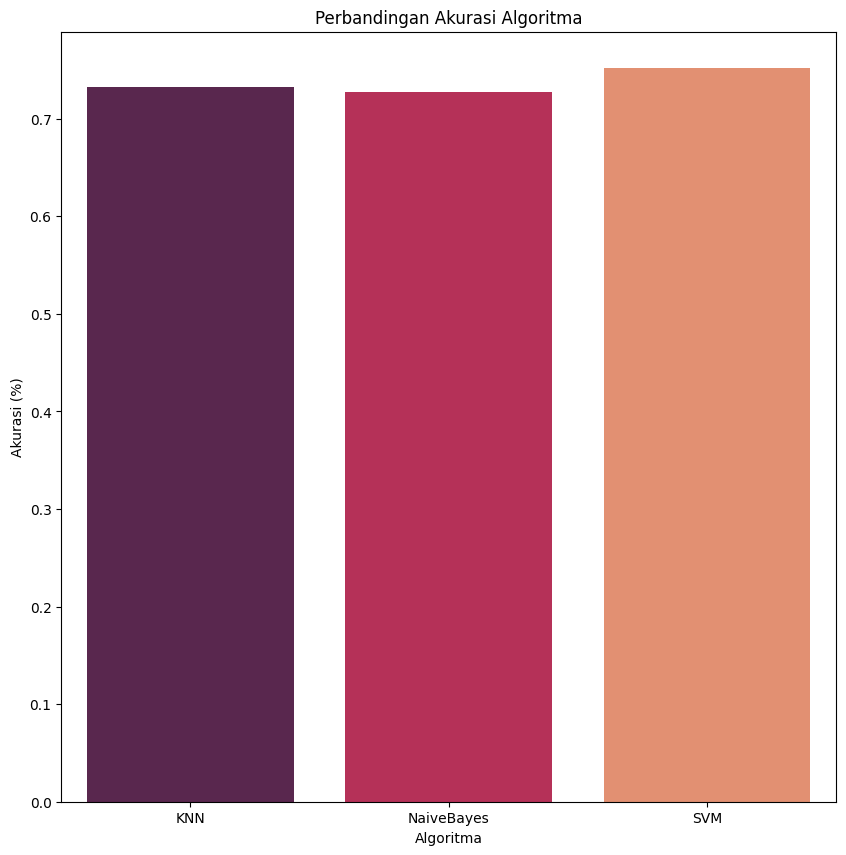

In [14]:
algoritma = ["KNN","NaiveBayes","SVM"]
akurasi = [akurasi_KNN,akurasi_gnb,akurasi_svm]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = akurasi,palette='rocket')

plt.title("Perbandingan Akurasi Algoritma")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Confusion matrix : 

 [[909 230]
 [414 202]]


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


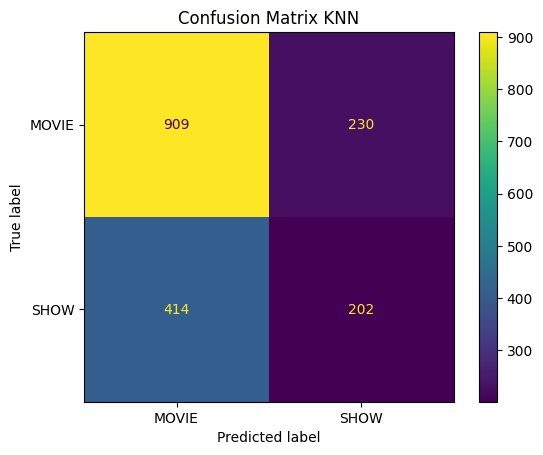

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_pred)
print('Confusion matrix : \n\n', cm)

displays = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
displays.plot()

plt.title("Confusion Matrix KNN")
plt.grid(False)

## HyperParameter Tuning (KNN)

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
modelKNN = KNeighborsClassifier()

param_grid = { "n_neighbors" :[i for i in range(0,5)]}

gsv = GridSearchCV(estimator=modelKNN, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gsv.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\nei

In [19]:
# parameter terbaik
print(gs.best_params_)

{'n_neighbors': 2}


In [20]:
print("Akurasi Training Set : ",round(gs.score(X_train,y_train)*100,1),"%")

Akurasi Training Set :  78.3 %


In [22]:
df.to_csv("titlesSupervised.csv")